In [1]:
import random
import copy
import logging
import sys
import os
import sys
import importlib
import numpy as np
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210614_2b_global_redundancy'

data_script = 'batch_210614_stability_vs_redundancy_2b_more'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'

n_mfs = 488
n_grcs = 1459
pattern_type = 'binary'
db = {}
direction = '0'
noise = '0.25'

model = 'shuffle'
db[model] = compress_pickle.load(
    db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_40.gz')

model = 'global_random'
db[model] = compress_pickle.load(
    db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_40.gz')

redundancy = 2.0
for redundancy in [2.0, 3.0, 4.0, 8.0, 16.0]:
    for n_share in [2, 3, 4]:
        model = f'global_random_{redundancy}_{n_share}'
        db[model] = compress_pickle.load(
            db_path+f'{data_script}_global_random_redundant_{redundancy}_nshare_{n_share}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_40.gz')

def get_average_delta(hist_sum, ref_sum):
    return sum(hist_sum)/len(hist_sum) - ref_sum

def get_signal_variance(hist_sum):
    return np.std(hist_sum, ddof=1)

def get_low_signal_val(hist_sum, pct=.025):
    return sorted(hist_sum, reverse=False)[int(len(hist_sum)*pct)]

def get_signal_variance_width(hist_sum):
    hist_sum = sorted(hist_sum)
    return hist_sum[int(.95*len(hist_sum))] - hist_sum[int(.05*len(hist_sum))]

def get_signal_loss(hist_sum, ref_sum):
    hist_sum = sorted(hist_sum)
    return ref_sum- hist_sum[int(.5*len(hist_sum))]
        


# avg_grc_dim_list = defaultdict(list)
# for ress in db['random']:
#     ress_tries = ress
#     for ress in ress_tries:
# #         print(ress)
#         for noise in ress:
#             res = ress[noise]
#             grc_dim = res['grc_dim']
#             avg_grc_dim_list[noise].append(grc_dim)

# avg_grc_dim = {}
# for noise in avg_grc_dim_list:
#     avg_grc_dim[noise] = sum(avg_grc_dim_list[noise])/len(avg_grc_dim_list[noise])

Height: 7.518796992481203, Aspect: 1.33


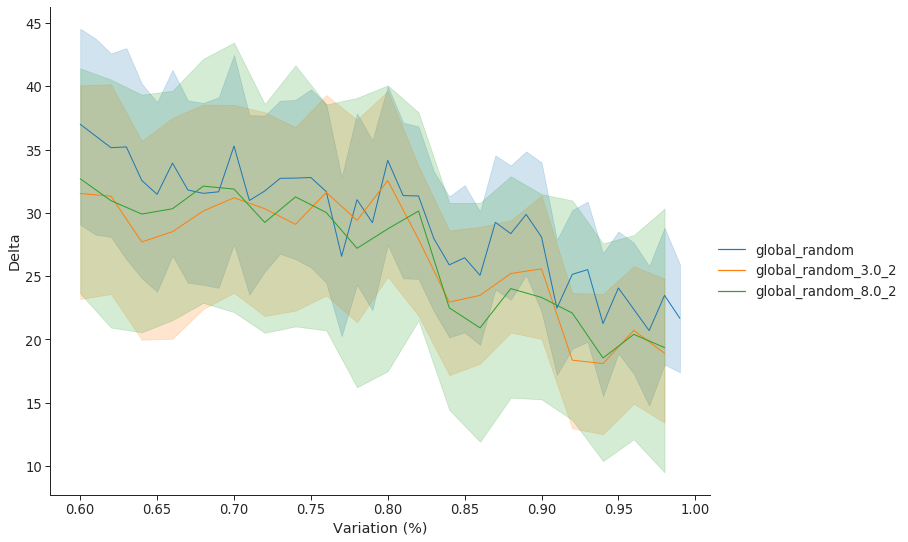

In [2]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
#         'naive_random_17': "Local Random",
        'shuffle': "Shuffle",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['shuffle']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}


mpd = MyPlotData()
ress_ref = db['shuffle'][0][0]
resss_ref2 = db['shuffle'][0]
for model_name in [
        'global_random',
#         'global_random_2.0_2',
        'global_random_3.0_2',
#         'global_random_4.0_2',
        'global_random_8.0_2',
#         'global_random_16.0_2',
#         'global_random_2.0_2',
#         'global_random_2.0_3',
#         'global_random_2.0_4',
        ]:
    ress = db[model_name]
    ress_tries = ress[0]  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        if n_try >= len(resss_ref2):
            print(n_try)
            continue
        ress_ref2 = resss_ref2[n_try]
        for noise in ress:
            res = ress[noise]
            res_ref2 = ress_ref2[noise]
            mpd.add_data_point(
                model=model_name,
                avg_delta=get_average_delta(res['hist_sum'], res['ref_sum0']),
                ref_delta=res['ref_delta'],
                variance=get_signal_variance(res['hist_sum']),
                low_signal=get_low_signal_val(res['hist_sum']),
                variance_width=get_signal_variance_width(res['hist_sum']),
                signal_loss=get_signal_loss(res['hist_sum'], res['ref_sum1']),
                noise=noise,
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='avg_delta',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
    width=10,
#     ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Delta',
    x_axis_label='Variation (%)',
    save_filename=f'{script_n}.svg',
    show=True,
    )


In [3]:
print(res['ref_sum0'])
print(res['ref_sum1'])
print(res['ref_delta'])
print(res['hist_sum'])

150
161
11
[172, 161, 163, 167, 159, 180, 188, 182, 159, 189, 188, 174, 171, 171, 196, 165, 198, 192, 184, 159, 186, 174, 193, 175, 175, 195, 169, 184, 163, 184, 202, 185, 170, 164, 164, 171, 168, 171, 167, 164, 181, 181, 182, 161, 188, 192, 182, 164, 152, 181, 175, 187, 174, 172, 168, 174, 172, 174, 184, 170, 185, 155, 179, 215, 182, 182, 153, 166, 175, 163, 182, 190, 167, 160, 167, 177, 163, 169, 189, 183, 162, 154, 155, 169, 189, 168, 177, 207, 178, 167, 202, 176, 163, 189, 178, 181, 181, 166, 164, 164, 184, 184, 178, 188, 161, 174, 136, 181, 167, 166, 190, 157, 178, 193, 167, 187, 182, 183, 209, 175, 174, 167, 156, 194, 167, 194, 195, 189, 178, 162, 171, 181, 196, 184, 162, 170, 176, 186, 185, 181, 171, 172, 160, 206, 204, 154, 192, 172, 183, 180, 192, 158, 197, 171, 147, 174, 179, 167, 173, 198, 185, 188, 186, 187, 164, 148, 162, 165, 165, 197, 184, 172, 165, 168, 181, 184, 172, 175, 190, 177, 167, 172, 170, 180, 179, 185, 170, 187, 204, 197, 167, 158, 172, 184, 178, 177, 155, 184

Height: 7.518796992481203, Aspect: 1.33


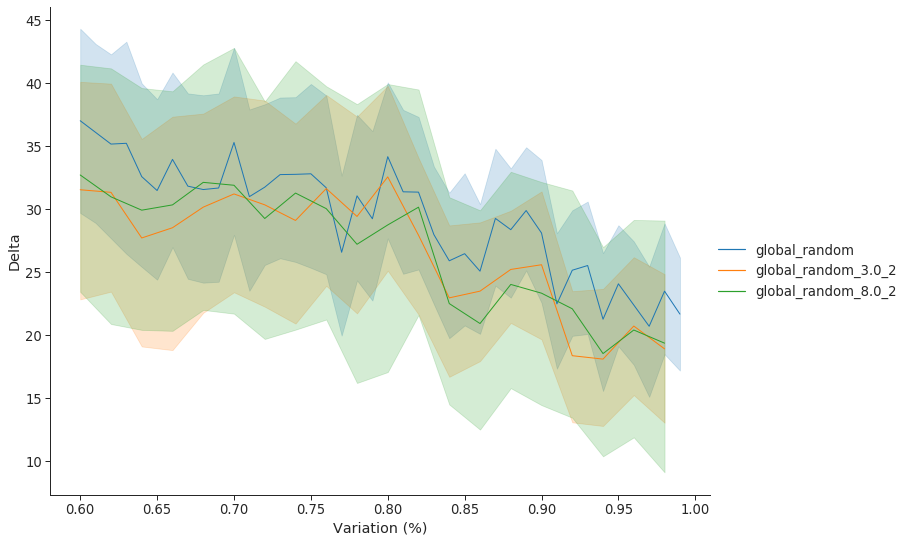

In [4]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='avg_delta',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
    width=10,
#     ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Delta',
    x_axis_label='Variation (%)',
    save_filename=f'{script_n}.svg',
    show=True,
    )
